In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

#colors
lightcoral = "#f08080"
lightskyblue = "#87cefa"
gold = "#FFD700"

In [25]:
#reading CSVs
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)


In [18]:
#merging data together
merge = pd.merge(citydata,ridedata, on = "city", how="outer")

merge = merge[['city','date','fare','ride_id','driver_count','type']]
merge.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [19]:
#grouping by city 
groupbytype = merge.groupby("city")

#counting city rides by city
cityctrides = groupbytype["ride_id"].count()

#average fare by city
citymeanfare = groupbytype["fare"].mean()

#table of city driver count, setting city as index
citydrivercount = citydata.set_index("city")
citydrivercount["Average Fare"] = citymeanfare
citydrivercount["number of rides"] = cityctrides

#creating seperate tables with each type
urban = citydrivercount.loc[citydrivercount["type"] == "Urban",:]
suburban = citydrivercount.loc[citydrivercount["type"] == "Suburban",:]
rural = citydrivercount.loc[citydrivercount["type"] == "Rural",:]


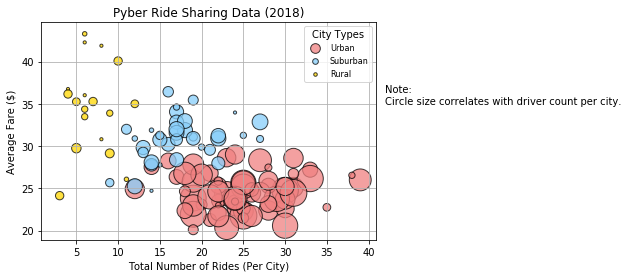

In [20]:
#urban scatter plot
urbanscatter = plt.scatter(urban["number of rides"], urban["Average Fare"], 
s=urban["driver_count"]*10, facecolors=lightcoral, alpha=.75, edgecolors='black')

#suburban scatter plot
suburbanscatter = plt.scatter(suburban["number of rides"], suburban["Average Fare"], 
s=suburban["driver_count"]*10, facecolors=lightskyblue, alpha=.75, edgecolors='black')

#rural scatter plot
ruralscatter = plt.scatter(rural["number of rides"], rural["Average Fare"], 
s=rural["driver_count"]*10, facecolors=gold, alpha=.75, edgecolors='black')

#scatter legend
plt.legend((urbanscatter,suburbanscatter, ruralscatter),
           ('Urban', 'Suburban', 'Rural'),
           scatterpoints=1,
           loc='upper right',
           title="City Types",
           markerscale= 0.5,
           fontsize=8)

#labeling
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2018)')
plt.text(42, 35,'Note:\n'+ 'Circle size correlates with driver count per city.')

plt.grid()

Text(0.5,1,'% of Total Fares by City Type')

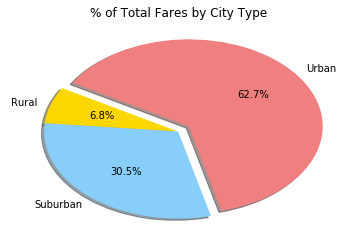

In [21]:
#plotting pie graph for % of total fares by city type

mergetype = merge.groupby("type")
piefare = pd.DataFrame(mergetype["fare"].sum())

explode = (0,0,0.1)
colors = [gold,lightskyblue,lightcoral]

plt.pie(piefare["fare"], labels=piefare.index, colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('% of Total Fares by City Type')


Text(0.5,1,'% of Total Rides by City Type')

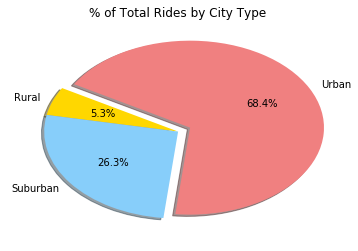

In [22]:
#plotting pie graph for % of Total Rides by City Type
piecount = pd.DataFrame(mergetype["ride_id"].count())

plt.pie(piecount["ride_id"], labels=piecount.index, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=150)

plt.title('% of Total Rides by City Type')

Text(0.5,1,'% of Total Drivers by City Type')

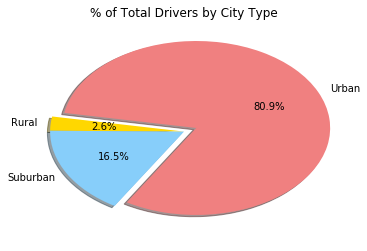

In [23]:
#plotting pie graph for % of Total Drivers by City Type
piedrivercount = citydrivercount[["driver_count","type"]]

#grouping data 
type1 = citydata.groupby("type")
piedriver = pd.DataFrame(type1["driver_count"].sum())

plt.pie(piedriver["driver_count"], labels=piedriver.index, explode=explode, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=170)

plt.title('% of Total Drivers by City Type')